In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv("DS-Fi-CSV.csv")

In [11]:
df.head()

,Shoe_ID,Shoe_Type,Model,Materials,Carbon_Footprint (Total CO2e in kg),Recyclability,End_of_life_disposal_options
0,M1,Children,Size 35,"Bovine hides (chrome tanned leather), acryloni...",4.050,Yes,Recyclable
1,M2,Children,Size 32,"Bovine hides (chrome tanned leather), acryloni...",3.100,Yes,Recyclable
2,M3,Children,Size 32,"Bovine hides (chrome tanned leather), acryloni...",7.140,Yes,Recyclable
3,M4,Women,Size 37,"Chrome-tanned bovine leather, acrylonite butad...",13.865,Yes,Recyclable
4,M5,Outdoor,Size 42,"Chrome-tanned bovine leather, metals (steel an...",12.390,Partially,Recyclable


In [12]:
df.dtypes

Shoe_ID                                 object
Shoe_Type                               object
Model                                   object
Materials                               object
Carbon_Footprint (Total CO2e in kg)    float64
Recyclability                           object
End_of_life_disposal_options            object
dtype: object

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Shoe_ID                              200 non-null    object 
 1   Shoe_Type                            200 non-null    object 
 2   Model                                200 non-null    object 
 3   Materials                            200 non-null    object 
 4   Carbon_Footprint (Total CO2e in kg)  200 non-null    float64
 5   Recyclability                        200 non-null    object 
 6   End_of_life_disposal_options         200 non-null    object 
dtypes: float64(1), object(6)
memory usage: 11.1+ KB


In [14]:
df.describe()

,Carbon_Footprint (Total CO2e in kg)
count,200.000000
mean,4.674300
std,2.064398
min,2.200000
25%,3.600000
50%,4.100000
75%,6.525000
max,13.865000


In [15]:
print(df.isnull().sum())

Shoe_ID                                0
Shoe_Type                              0
Model                                  0
Materials                              0
Carbon_Footprint (Total CO2e in kg)    0
Recyclability                          0
End_of_life_disposal_options           0
dtype: int64


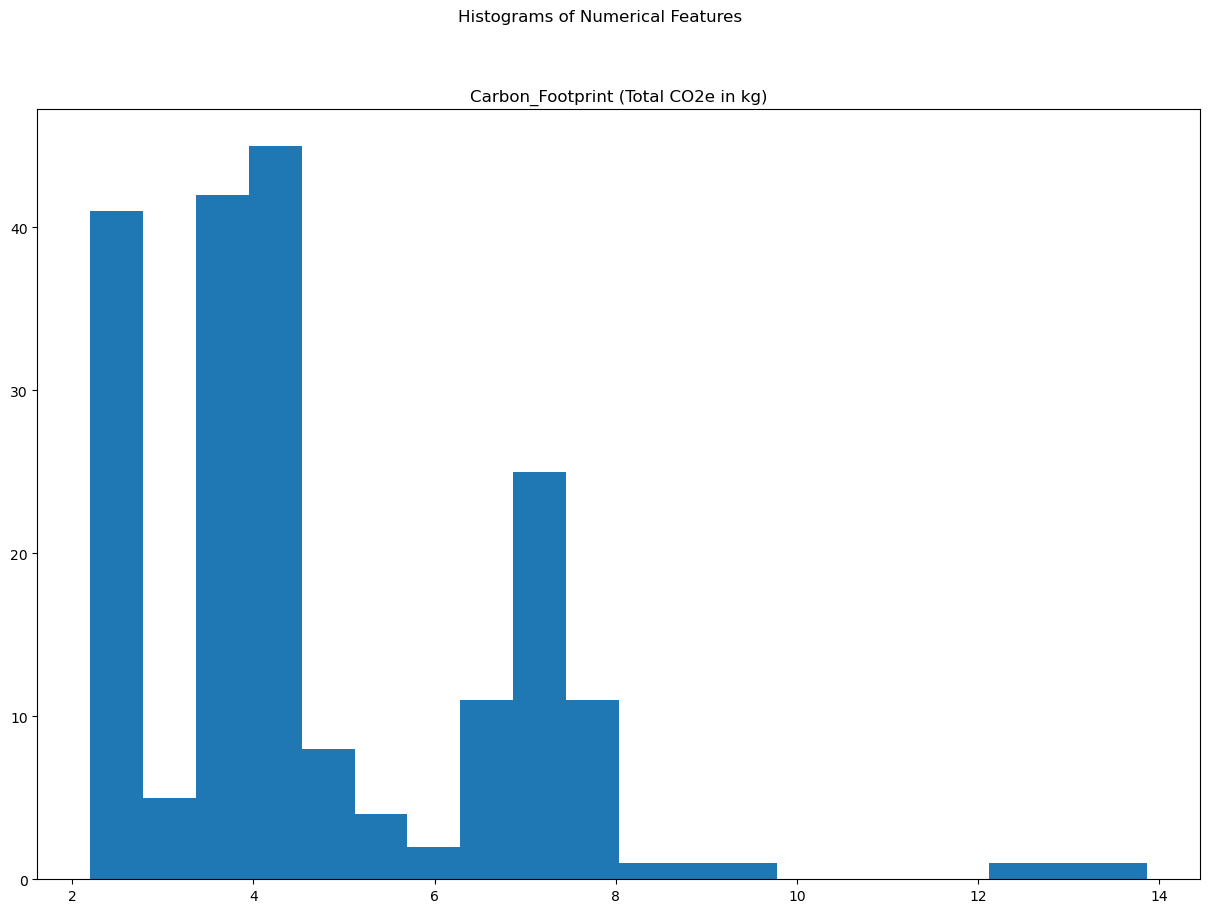

In [16]:
df.hist(bins=20, figsize=(15, 10), grid=False)
plt.suptitle('Histograms of Numerical Features')
plt.show()

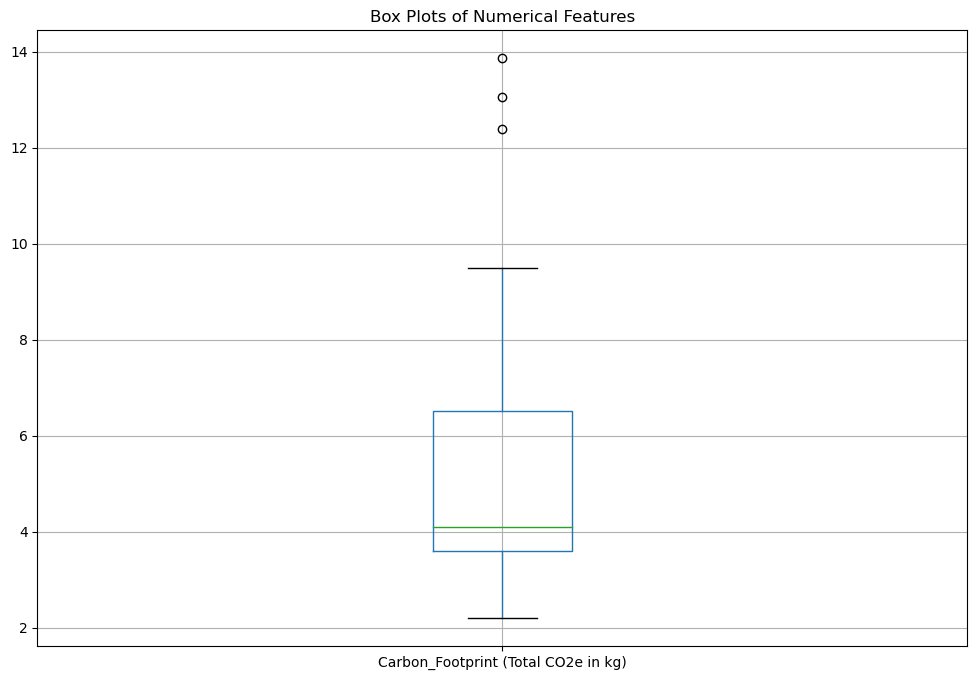

In [17]:
df.boxplot(figsize=(12, 8))
plt.title('Box Plots of Numerical Features')
plt.show()

In [18]:
# Identify columns to drop (e.g. unnecessary columns)
columns_to_drop = ['Model', 'End_of_life_disposal_options']
df = df.drop(columns=columns_to_drop)
df = df.drop(columns=['Shoe_ID'])
df.head()

,Shoe_Type,Materials,Carbon_Footprint (Total CO2e in kg),Recyclability
0,Children,"Bovine hides (chrome tanned leather), acryloni...",4.050,Yes
1,Children,"Bovine hides (chrome tanned leather), acryloni...",3.100,Yes
2,Children,"Bovine hides (chrome tanned leather), acryloni...",7.140,Yes
3,Women,"Chrome-tanned bovine leather, acrylonite butad...",13.865,Yes
4,Outdoor,"Chrome-tanned bovine leather, metals (steel an...",12.390,Partially


In [19]:
# Identify categorical columns to encode
categorical_columns = ['Shoe_Type', 'Materials', 'Recyclability']

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Perform one-hot encoding on categorical columns
one_hot_encoder = OneHotEncoder(sparse=False, drop='first')
# Create a column transformer to apply encoding and scaling to the dataset
preprocessor = ColumnTransformer([
    ('one_hot', one_hot_encoder, categorical_columns),
    ('scaler', StandardScaler(), df.columns.difference(categorical_columns + ['Carbon_Footprint (Total CO2e in kg)']))
])

In [21]:
# Apply preprocessor to the DataFrame
X = df.drop(columns='Carbon_Footprint (Total CO2e in kg)')
y = df['Carbon_Footprint (Total CO2e in kg)']
X = preprocessor.fit_transform(X)

In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
model = RandomForestRegressor(random_state=42)


In [24]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [25]:
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [26]:
best_model = grid_search.best_estimator_

In [27]:
y_pred = best_model.predict(X_test)


In [28]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 0.1593617291967843
R-squared Score: 0.9529528221957815


In [29]:
dm = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).reset_index()

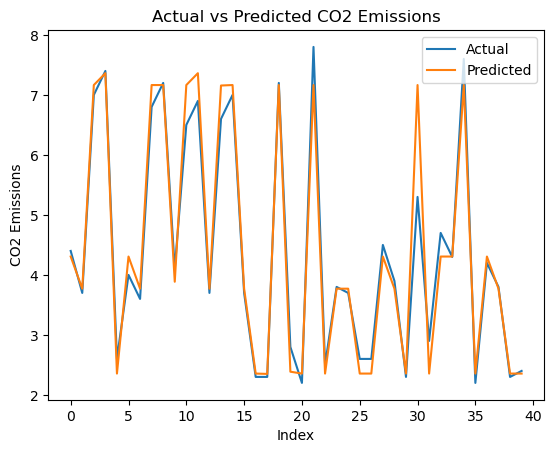

In [30]:
# Plot the graph
plt.plot(dm.index, dm['Actual'], label='Actual')
plt.plot(dm.index, dm['Predicted'], label='Predicted')
plt.title("Actual vs Predicted CO2 Emissions")
plt.xlabel("Index")
plt.ylabel("CO2 Emissions")
plt.legend()
plt.show()
























